In [1]:
# Load all dictionaries
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon

In [2]:
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

def heatmap(data, title):
    ax = sns.heatmap(data,vmin=0., vmax=1., cmap= 'viridis',
                    cbar_kws={"shrink": .82, 'ticks' : [0,0.33,0.66,1], 'label': 'decoding strength'}) ##sns.cm.rocket_r
    #ax = sns.heatmap(data, cmap= 'viridis') ##sns.cm.rocket_r
    ax.invert_yaxis()
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('train')
    plt.gca().set_xlabel('test (TRs)')
    plt.gca().set_title(title)
    plt.gca().set_xticks([0,4,8,12,16])
    plt.gca().set_xticklabels([0,4,8,12,16])
    plt.gca().set_yticks([0,4,8,12,16])
    plt.gca().set_yticklabels([0,4,8,12,16])
    plt.show(block=False)

In [43]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_b001_target_mix_octave.xlsx'


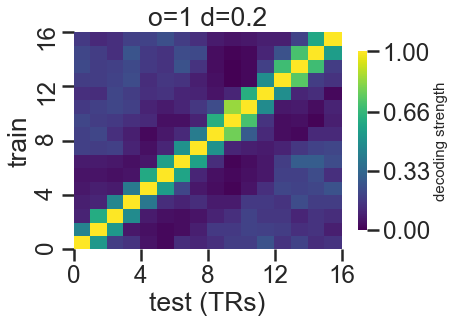

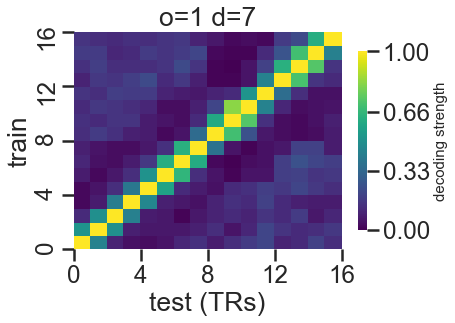

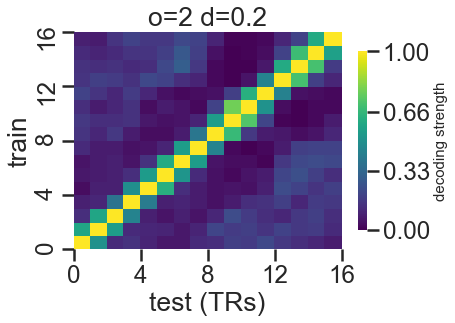

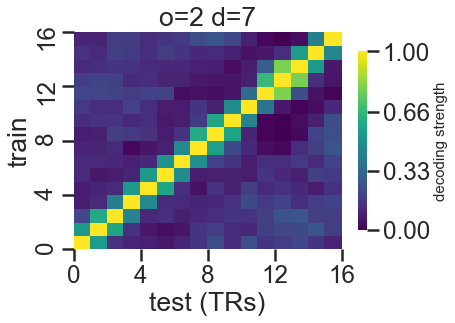

In [44]:
titles=['o=1 d=0.2', 'o=1 d=7', 'o=2 d=0.2', 'o=2 d=7']

for idx, sheets in enumerate(['b001_visual_1_0.2', 'b001_visual_1_7', 'b001_visual_2_0.2', 'b001_visual_2_7']):
    Df = pd.read_excel(path_save_signal, sheet_name=sheets)
    heatmap(Df, titles[idx])

## Shuffle

In [48]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\shuff_cross_b001_target_mix_octave.xlsx'
import xlrd
xls = xlrd.open_workbook(path_save_signal, on_demand=True)
xls.sheet_names()

['b001_ips_1_0.2_shuff_0',
 'b001_ips_1_0.2_shuff_1',
 'b001_ips_1_0.2_shuff_10',
 'b001_ips_1_0.2_shuff_11',
 'b001_ips_1_0.2_shuff_12',
 'b001_ips_1_0.2_shuff_13',
 'b001_ips_1_0.2_shuff_14',
 'b001_ips_1_0.2_shuff_15',
 'b001_ips_1_0.2_shuff_16',
 'b001_ips_1_0.2_shuff_17',
 'b001_ips_1_0.2_shuff_18',
 'b001_ips_1_0.2_shuff_19',
 'b001_ips_1_0.2_shuff_2',
 'b001_ips_1_0.2_shuff_20',
 'b001_ips_1_0.2_shuff_21',
 'b001_ips_1_0.2_shuff_22',
 'b001_ips_1_0.2_shuff_23',
 'b001_ips_1_0.2_shuff_24',
 'b001_ips_1_0.2_shuff_25',
 'b001_ips_1_0.2_shuff_26',
 'b001_ips_1_0.2_shuff_27',
 'b001_ips_1_0.2_shuff_28',
 'b001_ips_1_0.2_shuff_29',
 'b001_ips_1_0.2_shuff_3',
 'b001_ips_1_0.2_shuff_30',
 'b001_ips_1_0.2_shuff_31',
 'b001_ips_1_0.2_shuff_32',
 'b001_ips_1_0.2_shuff_33',
 'b001_ips_1_0.2_shuff_34',
 'b001_ips_1_0.2_shuff_35',
 'b001_ips_1_0.2_shuff_36',
 'b001_ips_1_0.2_shuff_37',
 'b001_ips_1_0.2_shuff_38',
 'b001_ips_1_0.2_shuff_39',
 'b001_ips_1_0.2_shuff_4',
 'b001_ips_1_0.2_shuff_40

## Train in 1_7 and test in the rest 

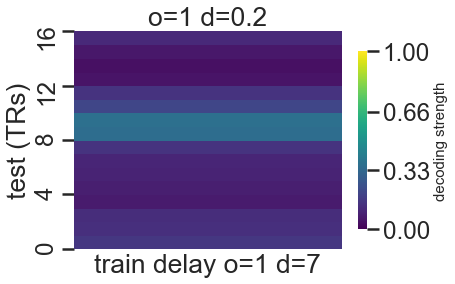

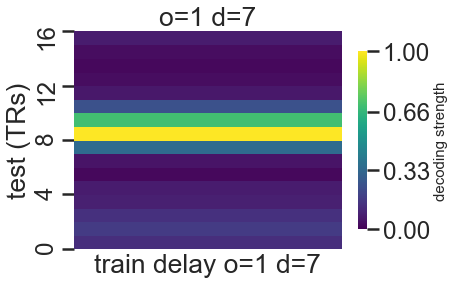

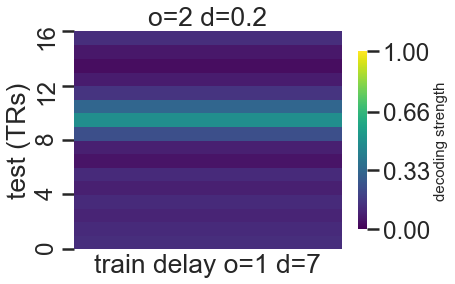

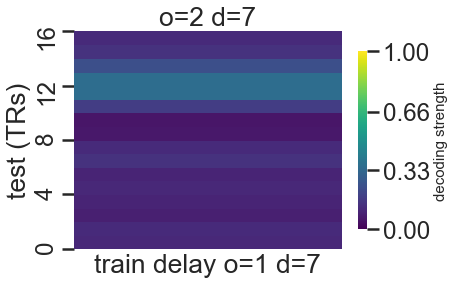

In [9]:
def heatmap_cond(data, title):
    ax = sns.heatmap(data,vmin=0., vmax=1., cmap= 'viridis',
                    cbar_kws={"shrink": .82, 'ticks' : [0,0.33,0.66,1], 'label': 'decoding strength'}) ##sns.cm.rocket_r
    #ax = sns.heatmap(data, cmap= 'viridis') ##sns.cm.rocket_r
    ax.invert_yaxis()
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('test (TRs)')
    plt.gca().set_xlabel('train delay o=1 d=7')
    plt.gca().set_title(title)
    plt.gca().set_yticks([0,4,8,12,16])
    plt.gca().set_yticklabels([0,4,8,12,16])
    plt.gca().set_xticks([])
    plt.show(block=False)


path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_b001_target_mix_octave_1_7.xlsx'

titles=['o=1 d=0.2', 'o=1 d=7', 'o=2 d=0.2', 'o=2 d=7']

for idx, sheets in enumerate(['b001_visual_1_0.2', 'b001_visual_1_7', 'b001_visual_2_0.2', 'b001_visual_2_7']):
    Df = pd.read_excel(path_save_signal, sheet_name=sheets)
    heatmap_cond(Df, titles[idx])

## By quadrant

In [105]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_b001_target_mix_quadrant.xlsx'
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_b001_ips_pfc_target_mix_quadrant.xlsx'

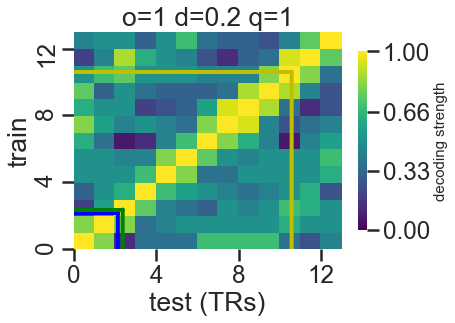

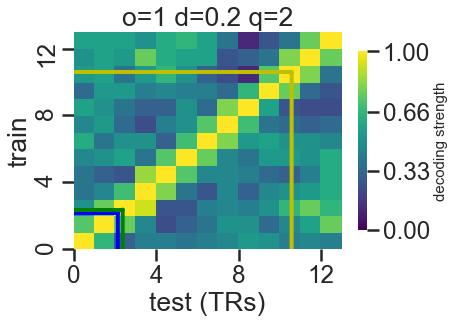

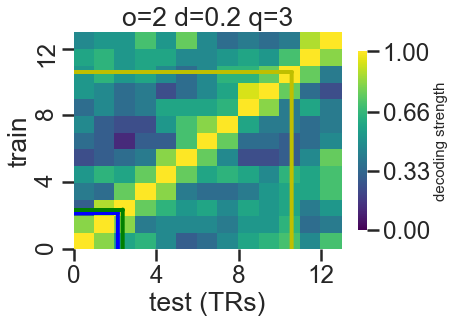

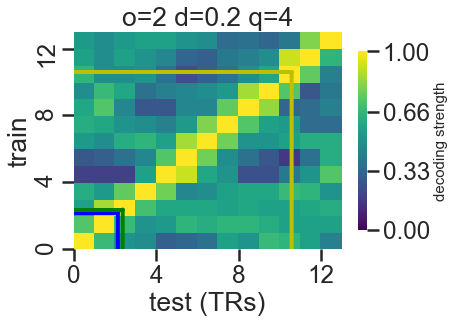

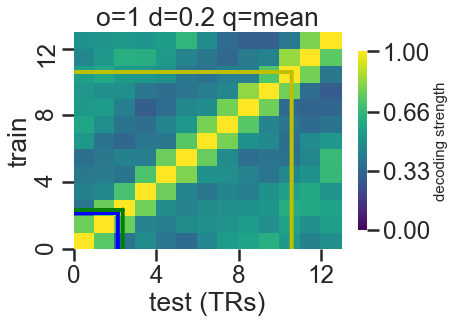

In [110]:
## 1_02
titles=['o=1 d=0.2 q=1', 'o=1 d=0.2 q=2', 'o=2 d=0.2 q=3', 'o=2 d=0.2 q=4']

Dfs = []
for idx, sheets in enumerate(['b001_pfc_1_0.2_1', 'b001_pfc_1_0.2_2', 'b001_pfc_1_0.2_3', 'b001_pfc_1_0.2_4' ]):
    Df = pd.read_excel(path_save_signal, sheet_name=sheets)
    Dfs.append(Df)
    heatmap_1_02(Df, titles[idx])

Df_m = pd.concat(Dfs).mean(level=0)
heatmap_1_02(Df_m, 'o=1 d=0.2 q=mean')

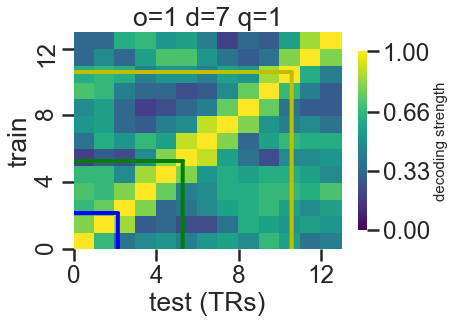

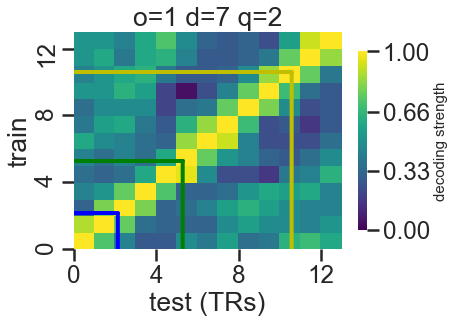

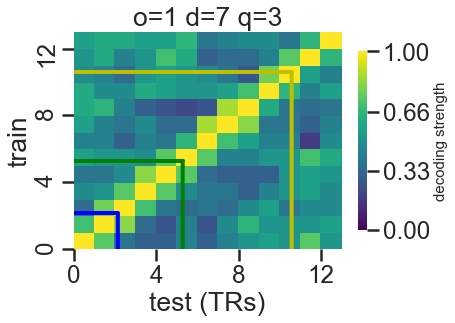

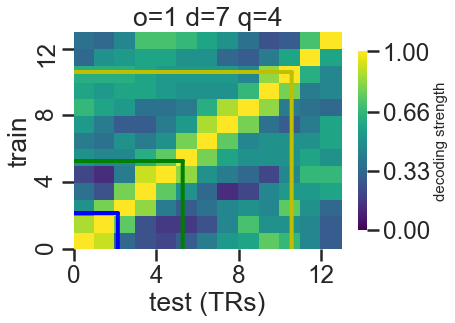

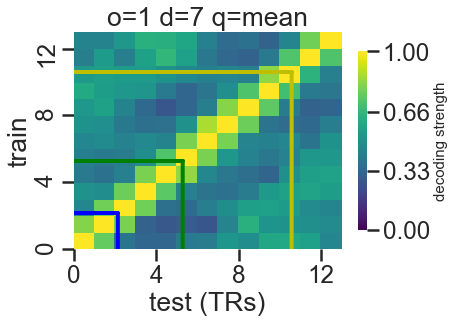

In [116]:
## 1_7
titles=['o=1 d=7 q=1', 'o=1 d=7 q=2', 'o=1 d=7 q=3', 'o=1 d=7 q=4']

Dfs = []
for idx, sheets in enumerate(['b001_pfc_1_7_1', 'b001_pfc_1_7_2', 'b001_pfc_1_7_3', 'b001_pfc_1_7_4' ]):
    Df = pd.read_excel(path_save_signal, sheet_name=sheets)
    Dfs.append(Df)
    heatmap_1_7(Df, titles[idx])

Df_m = pd.concat(Dfs).mean(level=0)
heatmap_1_7(Df_m, 'o=1 d=7 q=mean')

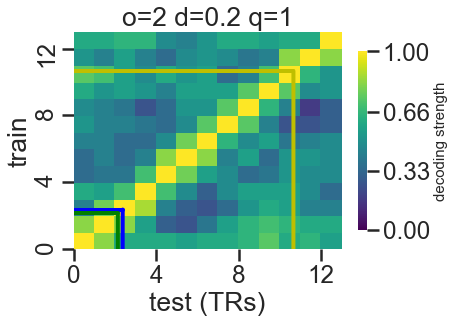

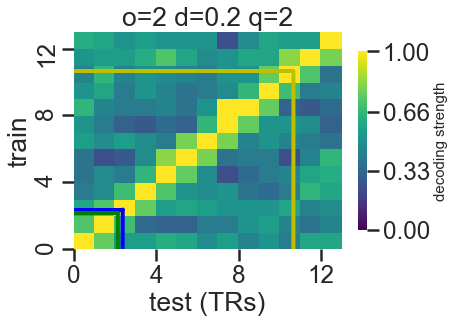

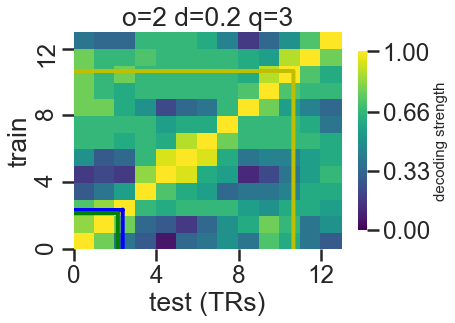

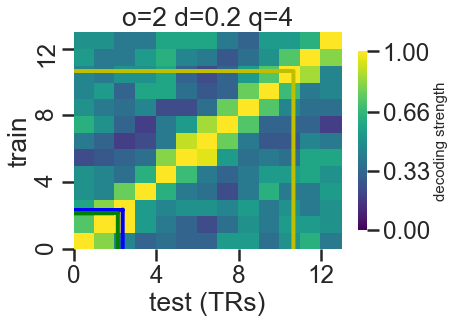

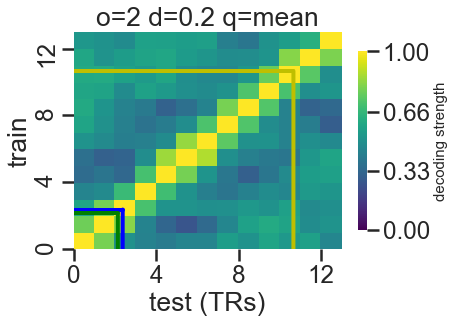

In [118]:
## 2_02
titles=['o=2 d=0.2 q=1', 'o=2 d=0.2 q=2', 'o=2 d=0.2 q=3', 'o=2 d=0.2 q=4']

Dfs = []
for idx, sheets in enumerate(['b001_pfc_2_0.2_1', 'b001_pfc_2_0.2_2', 'b001_pfc_2_0.2_3', 'b001_pfc_2_0.2_4' ]):
    Df = pd.read_excel(path_save_signal, sheet_name=sheets)
    Dfs.append(Df)
    heatmap_2_02(Df, titles[idx])

Df_m = pd.concat(Dfs).mean(level=0)
heatmap_2_02(Df_m, 'o=2 d=0.2 q=mean')

In [ ]:
## 2_7
titles=['o=2 d=0.2 q=1', 'o=2 d=0.2 q=2', 'o=2 d=0.2 q=3', 'o=2 d=0.2 q=4']

Dfs = []
for idx, sheets in enumerate(['b001_pfc_2_0.2_1', 'b001_pfc_2_0.2_2', 'b001_pfc_2_0.2_3', 'b001_pfc_2_0.2_4' ]):
    Df = pd.read_excel(path_save_signal, sheet_name=sheets)
    Dfs.append(Df)
    heatmap_2_02(Df, titles[idx])

Df_m = pd.concat(Dfs).mean(level=0)
heatmap_2_02(Df_m, 'o=2 d=0.2 q=mean')

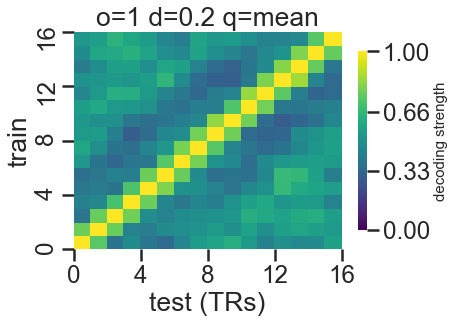

In [107]:
Df_m = pd.concat(Dfs).mean(level=0)
heatmap(Df_m, 'o=1 d=0.2 q=mean')

In [109]:
def heatmap_1_02(data, title):
    data=data.iloc[0:13, 0:13]
    ax = sns.heatmap(data,vmin=0., vmax=1., cmap= 'viridis',
                    cbar_kws={"shrink": .82, 'ticks' : [0,0.33,0.66,1], 'label': 'decoding strength'}) ##sns.cm.rocket_r
    #ax = sns.heatmap(data, cmap= 'viridis') ##sns.cm.rocket_r
    ax.invert_yaxis()
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('train')
    plt.gca().set_xlabel('test (TRs)')
    plt.gca().set_title(title)
    plt.gca().set_xticks([0,4,8,12])
    plt.gca().set_xticklabels([0,4,8,12])
    plt.gca().set_yticks([0,4,8,12])
    plt.gca().set_yticklabels([0,4,8,12])
    #sns.lineplot(x=[4.0,4.0001], y=[0,4], color='r', linewidth=12)
    #### lines
    presentation_period= 0.35 #stim presnetation time
    presentation_period_cue=  0.50 #presentation of attentional cue time
    pre_stim_period= 0.5 #time between cue and stim
    resp_time = 4  #time the response is active
    start_hrf = 4 #start of the Hemodynamic response (4seconds)
    sec_hdrf = 3
    delay1 = 0.2
    delay2 = 11.8
    cue=0
    t_p = cue + presentation_period_cue + pre_stim_period + start_hrf
    d_p = t_p + presentation_period +delay1
    r_t = d_p + presentation_period + delay2 
    #
    t_p_st = t_p/2.335    
    d_p_st = d_p/2.335
    r_t_st = (r_t+sec_hdrf+4)/2.335
    #t_p_en = (t_p+sec_hdrf) /2.335
    ##stim
    sns.lineplot(x=[t_p_st,t_p_st+0.001], y=[0,t_p_st], color='b', linewidth=4) # añadir 0.001 o no se ve
    sns.lineplot(x=[0, t_p_st], y=[t_p_st,t_p_st], color='b', linewidth=4) # añadir 0.001 o no se ve
    ##Distractor
    sns.lineplot(x=[d_p_st,d_p_st+0.001], y=[0,d_p_st], color='g', linewidth=4) 
    sns.lineplot(x=[0, d_p_st], y=[d_p_st,d_p_st], color='g', linewidth=4) 
    ##Response
    sns.lineplot(x=[r_t_st,r_t_st+0.001], y=[0,r_t_st], color='y', linewidth=4) 
    sns.lineplot(x=[0, r_t_st], y=[r_t_st, r_t_st], color='y', linewidth=4) 
    plt.show(block=False)

In [113]:
def heatmap_2_02(data, title):
    data=data.iloc[0:13, 0:13]
    ax = sns.heatmap(data,vmin=0., vmax=1., cmap= 'viridis',
                    cbar_kws={"shrink": .82, 'ticks' : [0,0.33,0.66,1], 'label': 'decoding strength'}) ##sns.cm.rocket_r
    #ax = sns.heatmap(data, cmap= 'viridis') ##sns.cm.rocket_r
    ax.invert_yaxis()
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('train')
    plt.gca().set_xlabel('test (TRs)')
    plt.gca().set_title(title)
    plt.gca().set_xticks([0,4,8,12])
    plt.gca().set_xticklabels([0,4,8,12])
    plt.gca().set_yticks([0,4,8,12])
    plt.gca().set_yticklabels([0,4,8,12])
    #sns.lineplot(x=[4.0,4.0001], y=[0,4], color='r', linewidth=12)
    #### lines
    presentation_period= 0.35 #stim presnetation time
    presentation_period_cue=  0.50 #presentation of attentional cue time
    pre_stim_period= 0.5 #time between cue and stim
    resp_time = 4  #time the response is active
    start_hrf = 4 #start of the Hemodynamic response (4seconds)
    sec_hdrf = 3
    delay1 = 0.2
    delay2 = 12
    cue=0
    d_p = cue + presentation_period_cue + pre_stim_period + start_hrf
    t_p = d_p + presentation_period +delay1 
    r_t = t_p + presentation_period + delay2 
    #
    t_p_st = t_p/2.335    
    d_p_st = d_p/2.335
    r_t_st = (r_t+sec_hdrf+4)/2.335
    #t_p_en = (t_p+sec_hdrf) /2.335
    ##stim
    sns.lineplot(x=[t_p_st,t_p_st+0.001], y=[0,t_p_st], color='b', linewidth=4) # añadir 0.001 o no se ve
    sns.lineplot(x=[0, t_p_st], y=[t_p_st,t_p_st], color='b', linewidth=4) # añadir 0.001 o no se ve
    ##Distractor
    sns.lineplot(x=[d_p_st,d_p_st+0.001], y=[0,d_p_st], color='g', linewidth=4) 
    sns.lineplot(x=[0, d_p_st], y=[d_p_st,d_p_st], color='g', linewidth=4) 
    ##Response
    sns.lineplot(x=[r_t_st,r_t_st+0.001], y=[0,r_t_st], color='y', linewidth=4) 
    sns.lineplot(x=[0, r_t_st], y=[r_t_st, r_t_st], color='y', linewidth=4) 
    plt.show(block=False)

In [112]:
def heatmap_1_7(data, title):
    data=data.iloc[0:13, 0:13]
    ax = sns.heatmap(data,vmin=0., vmax=1., cmap= 'viridis',
                    cbar_kws={"shrink": .82, 'ticks' : [0,0.33,0.66,1], 'label': 'decoding strength'}) ##sns.cm.rocket_r
    #ax = sns.heatmap(data, cmap= 'viridis') ##sns.cm.rocket_r
    ax.invert_yaxis()
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('train')
    plt.gca().set_xlabel('test (TRs)')
    plt.gca().set_title(title)
    plt.gca().set_xticks([0,4,8,12])
    plt.gca().set_xticklabels([0,4,8,12])
    plt.gca().set_yticks([0,4,8,12])
    plt.gca().set_yticklabels([0,4,8,12])
    #sns.lineplot(x=[4.0,4.0001], y=[0,4], color='r', linewidth=12)
    #### lines
    presentation_period= 0.35 #stim presnetation time
    presentation_period_cue=  0.50 #presentation of attentional cue time
    pre_stim_period= 0.5 #time between cue and stim
    resp_time = 4  #time the response is active
    start_hrf = 4 #start of the Hemodynamic response (4seconds)
    sec_hdrf = 3
    delay1 = 7
    delay2 = 5
    cue=0
    t_p = cue + presentation_period_cue + pre_stim_period + start_hrf
    d_p = t_p + presentation_period +delay1
    r_t = d_p + presentation_period + delay2 
    #
    t_p_st = t_p/2.335    
    d_p_st = d_p/2.335
    r_t_st = (r_t+sec_hdrf+4)/2.335
    #t_p_en = (t_p+sec_hdrf) /2.335
    ##stim
    sns.lineplot(x=[t_p_st,t_p_st+0.001], y=[0,t_p_st], color='b', linewidth=4) # añadir 0.001 o no se ve
    sns.lineplot(x=[0, t_p_st], y=[t_p_st,t_p_st], color='b', linewidth=4) # añadir 0.001 o no se ve
    ##Distractor
    sns.lineplot(x=[d_p_st,d_p_st+0.001], y=[0,d_p_st], color='g', linewidth=4) 
    sns.lineplot(x=[0, d_p_st], y=[d_p_st,d_p_st], color='g', linewidth=4) 
    ##Response
    sns.lineplot(x=[r_t_st,r_t_st+0.001], y=[0,r_t_st], color='y', linewidth=4) 
    sns.lineplot(x=[0, r_t_st], y=[r_t_st, r_t_st], color='y', linewidth=4) 
    plt.show(block=False)

In [114]:
def heatmap_2_7(data, title):
    #data=data.iloc[0:13, 0:13]
    ax = sns.heatmap(data,vmin=0., vmax=1., cmap= 'viridis',
                    cbar_kws={"shrink": .82, 'ticks' : [0,0.33,0.66,1], 'label': 'decoding strength'}) ##sns.cm.rocket_r
    #ax = sns.heatmap(data, cmap= 'viridis') ##sns.cm.rocket_r
    ax.invert_yaxis()
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('train')
    plt.gca().set_xlabel('test (TRs)')
    plt.gca().set_title(title)
    plt.gca().set_xticks([0,4,8,12,16])
    plt.gca().set_xticklabels([0,4,8,12,16])
    plt.gca().set_yticks([0,4,8,12,16])
    plt.gca().set_yticklabels([0,4,8,12,16])
    #sns.lineplot(x=[4.0,4.0001], y=[0,4], color='r', linewidth=12)
    #### lines
    presentation_period= 0.35 #stim presnetation time
    presentation_period_cue=  0.50 #presentation of attentional cue time
    pre_stim_period= 0.5 #time between cue and stim
    resp_time = 4  #time the response is active
    start_hrf = 4 #start of the Hemodynamic response (4seconds)
    sec_hdrf = 3
    delay1 = 7
    delay2 = 12
    cue=0
    d_p = cue + presentation_period_cue + pre_stim_period + start_hrf
    t_p = d_p + presentation_period +delay1 
    r_t = t_p + presentation_period + delay2 
    #
    t_p_st = t_p/2.335    
    d_p_st = d_p/2.335
    r_t_st = (r_t+sec_hdrf+4)/2.335
    #t_p_en = (t_p+sec_hdrf) /2.335
    ##stim
    sns.lineplot(x=[t_p_st,t_p_st+0.001], y=[0,t_p_st], color='b', linewidth=4) # añadir 0.001 o no se ve
    sns.lineplot(x=[0, t_p_st], y=[t_p_st,t_p_st], color='b', linewidth=4) # añadir 0.001 o no se ve
    ##Distractor
    sns.lineplot(x=[d_p_st,d_p_st+0.001], y=[0,d_p_st], color='g', linewidth=4) 
    sns.lineplot(x=[0, d_p_st], y=[d_p_st,d_p_st], color='g', linewidth=4) 
    ##Response
    sns.lineplot(x=[r_t_st,r_t_st+0.001], y=[0,r_t_st], color='y', linewidth=4) 
    sns.lineplot(x=[0, r_t_st], y=[r_t_st, r_t_st], color='y', linewidth=4) 
    plt.show(block=False)

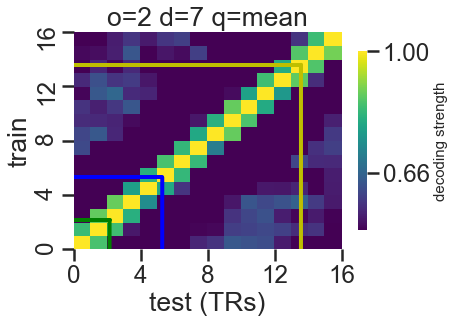

In [98]:
heatmap_2_7(Df_m, 'o=2 d=7 q=mean')

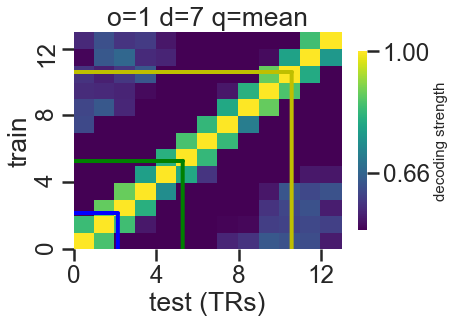

In [99]:
heatmap_1_7(Df_m, 'o=1 d=7 q=mean')

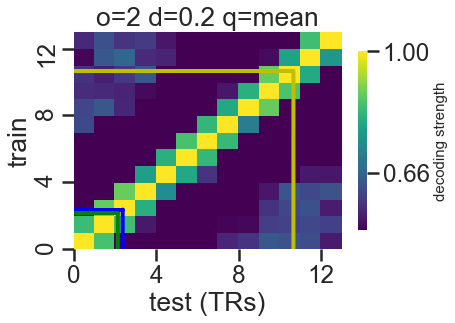

In [100]:
heatmap_2_02(Df_m, 'o=2 d=0.2 q=mean')

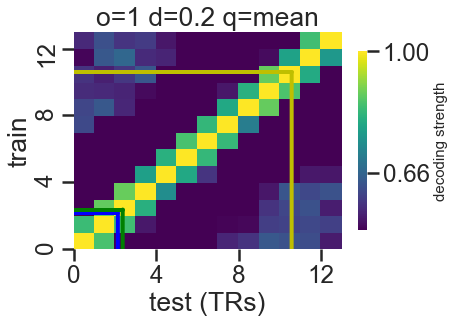

In [101]:
heatmap_1_02(Df_m, 'o=1 d=0.2 q=mean')

In [31]:
presentation_period= 0.35 #stim presnetation time
presentation_period_cue=  0.50 #presentation of attentional cue time
pre_stim_period= 0.5 #time between cue and stim
resp_time = 4  #time the response is active
start_hrf = 4 #start of the Hemodynamic response (4seconds)
sec_hdrf = 3

In [24]:
2.335*np.array([0,4,8,12,16])

array([ 0.  ,  9.34, 18.68, 28.02, 37.36])

In [ ]:
presentation_period= 0.35 #stim presnetation time
presentation_period_cue=  0.50 #presentation of attentional cue time
pre_stim_period= 0.5 #time between cue and stim
resp_time = 4  #time the response is active


start_hrf = 4 #start of the Hemodynamic response (4seconds)
sec_hdrf = 3


        if C == '1_0.2':
            title_='o=1, d=0.2'
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif C == '1_7':
            title_='o=1, d=7'
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif C == '2_0.2':
            title_='o=2, d=0.2'
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [1, 30]

        elif C == '2_7':
            title_='o=2, d=7'
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [1, 36]



        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)